## Handwritten Digit Classifier using a Simple Neural Network with 99.4% accuracy

### MNIST Dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. This dataset is considered to be the "hello world" dataset for Computer Vision.

I have written a blog to give a better explanation of the approach I have used, here is the link - https://medium.com/analytics-vidhya/get-started-with-your-first-deep-learning-project-7d989cb13ae5

It has a training set of 60,000 examples and a test set of 10,000 examples for handwritten digits with a fixed dimension of 28X28 pixels. The goal is to correctly identify digits and find ways to improve the performance of the model. So let's dive into it -

## Import the required libraries

In [1]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils                         
from sklearn.model_selection import train_test_split 

NumPy is an advanced Math Library in Python. Matplotlib will be used to plot graphs and for data visualization. We will import the MNIST dataset which is pre-loaded in Keras. We will use the Sequential Model and import the basic layers and util tools.

## Load the Dataset

In [2]:
train_inputs = pd.read_csv("../input/mnistmodified/train.csv")
train_inputs = np.array(train_inputs)[:,:-1] 

train_labels = pd.read_csv("../input/mnistmodified/train_result.csv")
train_labels = np.array(train_labels)[:,1] 

test_inputs = pd.read_csv("../input/mnistmodified/test.csv")
test_inputs = np.array(test_inputs)[:,:-1] 

#X_train, X_test, y_train, y_test = train_test_split(train_inputs, train_labels, test_size=0.30)
X_train = train_inputs
y_train = train_labels
X_test = test_inputs
y_test = train_labels[40000:] #Pas de y_test mais en attendant

In [3]:
test_data = pd.read_csv('../input/mnistmodified/test.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 1568)])

We load the dataset and verify the dimensions of the training and testing sets.

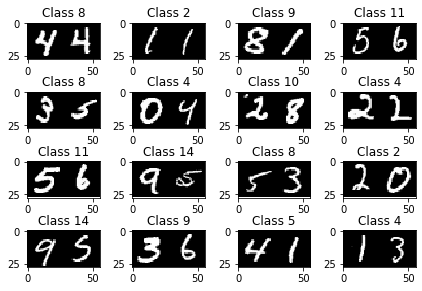

In [4]:
for i in range(16):
    plt.subplot(4,4,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num].reshape(28,56), cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Here we are randomly selecting 9 images from the dataset and plotting them to get an idea of the handwritten digits and their respective classes.

## Data Preprocessing

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector. Pixel values range from 0 to 255 where 0 is black and 255 is pure white. We will normalize these values by dividing them by 255 so that we get the output pixel values between [0,1] in the same magnitude.

Note that we are working with grayscale images of dimension 28 x 28 pixels. If we have color images, we have 3 channels for RGB, i.e. 28 x 28 x 3, each with pixel value in the range 0 to 255.

In [5]:


print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (50000, 1568)
Testing matrix shape (10000, 1568)


In [6]:
no_classes = 19

Y_train = np_utils.to_categorical(y_train, no_classes)
Y_test = np_utils.to_categorical(y_test, no_classes)

Since the output will be classified as one of the 10 classes we use one-hot encoding technique to form the output (Y variable). Read more about one-hot encoding here - https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/



## Building a 3-layer Neural Network

![alt text](https://chsasank.github.io/assets/images/crash_course/mnist_net.png)


In [7]:
model = Sequential()

2022-10-29 05:30:55.404884: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


The sequential API allows you to create models layer-by-layer.

## First Hidden Layer

In [8]:
model.add(Dense(512, input_shape=(1568,))) 

The first hidden layer has 512 nodes (neurons) whose input is a vector of size 784. Each node will receive an element from each input vector and apply some weight and bias to it.

In [9]:
model.add(Activation('relu'))

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. ReLU stands for rectified linear unit, and is a type of activation function. $$ ReLU: f(x) = max (0,x)$$

In [10]:
model.add(Dropout(0.2))

Dropout randomly selects a few nodes and nullifies their output (deactivates the node). This helps in ensuring that the model is not overfitted to the training dataset.

## Second Hidden Layer

In [11]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

The second hidden layer also has 512 nodes and it takes input from the 512 nodes in the previous layer and gives its output to the next subsequent layer.

## Final Output Layer

The final layer of 10 neurons in fully-connected to the previous 512-node layer.
The final layer should be equal to the number of desired output classes.

In [12]:
model.add(Dense(19))
model.add(Activation('softmax'))

The Softmax Activation represents a probability distribution over n different possible outcomes. Its values are all non-negative and sum to 1. For example, if the final output is: [0, 0.94, 0, 0, 0, 0, 0, 0.06, 0, 0] then it is most probable that the image is that of the digit 1

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               803328    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                9


## Compiling the model

When compiling a model, Keras asks you to specify your loss function and your optimizer.

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

The loss function we'll use here is called categorical cross-entropy and is a loss function well-suited to comparing two probability distributions. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. <br><br>
Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the loss function. In our case, we use the Adam Optimizer.

In [16]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=1000,
          verbose=1)

2022-10-29 05:31:23.621224: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
391/391 [==============================] - 5s 12ms/step - loss: 1.5837 - accuracy: 0.4806
Epoch 2/1000
391/391 [==============================] - 5s 12ms/step - loss: 0.7466 - accuracy: 0.7701
Epoch 3/1000
391/391 [==============================] - 5s 12ms/step - loss: 0.5258 - accuracy: 0.8382
Epoch 4/1000
391/391 [==============================] - 5s 12ms/step - loss: 0.4144 - accuracy: 0.8724
Epoch 5/1000
391/391 [==============================] - 5s 12ms/step - loss: 0.3245 - accuracy: 0.9005
Epoch 6/1000
391/391 [==============================] - 5s 12ms/step - loss: 0.2631 - accuracy: 0.9187
Epoch 7/1000
391/391 [==============================] - 6s 14ms/step - loss: 0.2238 - accuracy: 0.9298
Epoch 8/1000
391/391 [==============================] - 5s 12ms/step - loss: 0.1855 - accuracy: 0.9409
Epoch 9/1000
391/391 [==============================] - 5s 12ms/step - loss: 0.1645 - accuracy: 0.9477
Epoch 10/1000
391/391 [==============================] - 5s 12ms/step - l

The batch size determines how much data per step is used to compute the loss function, gradients, and backpropagation. Note that the accuracy increases after every epoch. We need to have a balanced number of epochs as higher epochs come at the risk of overfitting the model to the training set and may result in lower accuracy in the test case.

## Evaluate the model

We will now evaluate our model against the Testing dataset

In [ ]:
score = model.evaluate(X_test, Y_test)
print(model.predict(X_test))
print('Test accuracy:', score[1])

Plot the accuracy and loss metrics of the model.

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [17]:
results = model.predict(X_test)

In [18]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Class")
submission = pd.concat([pd.Series(np.arange(0,len(X_test) ).astype(int),name = "Index"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [20]:
submission

,Index,Class
0,0,14
1,1,7
2,2,10
3,3,7
4,4,5
...,...,...
9995,9995,7
9996,9996,12
9997,9997,10
9998,9998,4


Now let us introspect a few correctly and wrongly classified images to get a better understanding of where the model fails and hopefully take corrective measures to increse its accuracy.

In [ ]:
predicted_classes = model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

Congratulations on completing your first Deep Learning model. I hope you understood the basic concepts behind data pre-processing, model framing, training, and testing.

There are many ways in which we can improve the performance of the model by tuning the hyperparameters, data validation, augmentation, trying different optimizers and avoiding biased training, and many more! 

I have written a blog to give a better explanation of the approach I have used, here is the link - https://medium.com/analytics-vidhya/get-started-with-your-first-deep-learning-project-7d989cb13ae5

Let me know if you have any suggestions/doubts. Happy Kaggling :)